# EN5204 Assignment 1 on Image Processing: Intensity Transformations and Neighborhood Filtering
#### Sivayogaraj.K 
#### 228047A

## Import Required packages 

In [8]:
import cv2 as cv 
import math
import numpy as np
import matplotlib.pyplot as plt

## Question 1

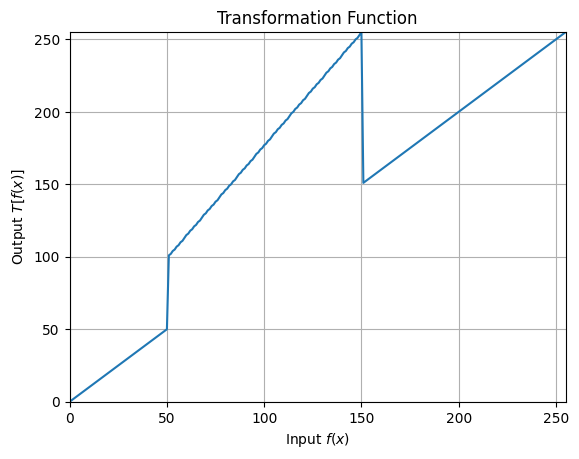

In [9]:
img = cv.imread('images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('1.image_Orig.jpg',img)

t1 = np.linspace(0,50,51).astype('uint8')   #Creating regions Look up table
t2 = np.linspace(50,100,0).astype('uint8')   
t3 = np.linspace(101,255,100).astype('uint8')   
t4 = np.linspace(255,150,0).astype('uint8')
t5 = np.linspace(151,255,105).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8') #Creating the transformation functions

im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
cv.imwrite('1.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
plt.savefig('1.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

## Question 2 

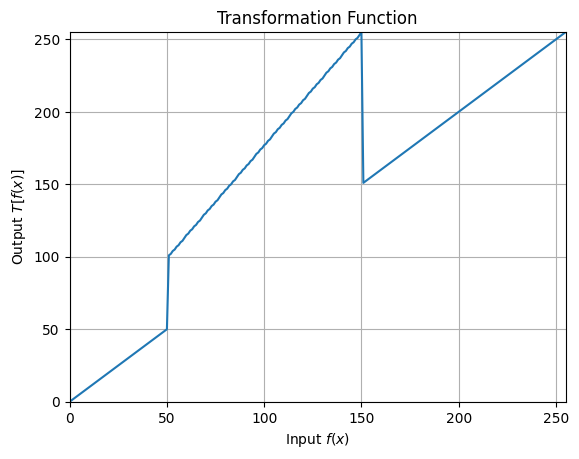

In [10]:
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('2.1.image_Orig.jpg',img)

im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
cv.imwrite('2.1.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
plt.savefig('2.1.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

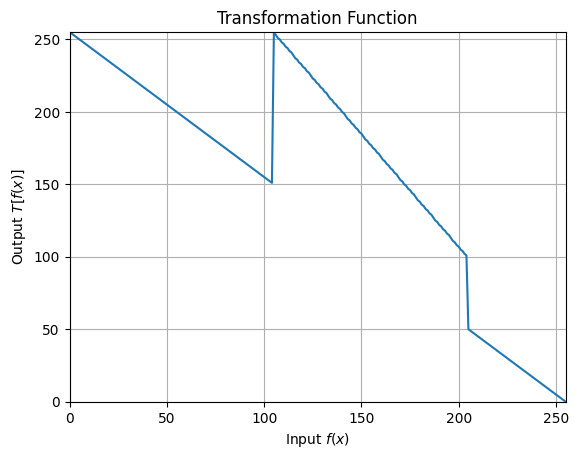

In [11]:
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('2.2.image_Orig.jpg',img)

transform=np.flip(transform)
im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
cv.imwrite('2.2.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
plt.savefig('2.2.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

## Question 3

In [12]:
def GammaCorr(image=0,gamma = 1.0):
    table = np.arange(0,256).astype('uint8')
    table = (((table/255.0)**gamma)*255).astype('uint8')
    return table[image]

img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
cv.imwrite('3.image_Orig.jpg',img)

for r in np.arange(0.0,2.5,0.1):
    if r==1.0:
        continue
    adj = GammaCorr(img,r)
    cv.putText(adj,"Gamma = {}".format(r),(20,40),cv.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),3)
    cv.namedWindow('Images',cv.WINDOW_NORMAL)
    cv.imshow('Images',np.hstack([img,adj]))
    cv.imwrite('3.GammaCorrection_Results/Gamma_%.1f.jpg'%r,adj)
    cv.waitKey(100)
cv.destroyAllWindows()


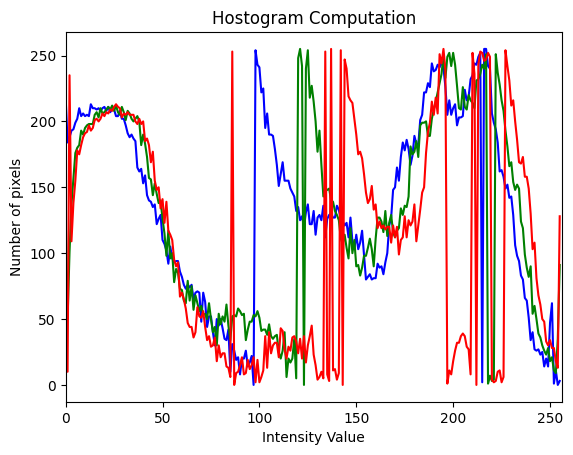

True

In [13]:
img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)

b,g,r = cv.split(img)
layers = np.array([b,g,r])
color = ['b','g','r']
for i,channel in enumerate(layers):
    hist = np.zeros(256)
    for r in channel:
        hist[r]+=1
    plt.plot(hist.astype('uint8'),color=color[i])
    plt.xlim(0,256)

    
plt.xlabel('Intensity Value')
plt.ylabel('Number of pixels')
plt.title('Hostogram Computation')
plt.savefig('3.1.plot.png')
plt.show()

cv.imwrite('3.1.image.jpg',img)

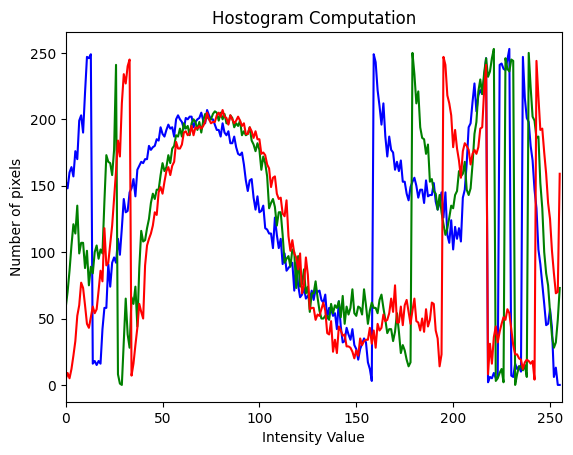

True

In [14]:
img = cv.imread('3.GammaCorrection_Results/Gamma_0.5.jpg',cv.IMREAD_COLOR)

b,g,r = cv.split(img)
layers = np.array([b,g,r])
color = ['b','g','r']
for i,channel in enumerate(layers):
    hist = np.zeros(256)
    for r in channel:
        hist[r]+=1
    plt.plot(hist.astype('uint8'),color=color[i])
    plt.xlim(0,256)


plt.xlabel('Intensity Value')
plt.ylabel('Number of pixels')
plt.title('Hostogram Computation')
plt.savefig('3.2.plot.png')
plt.show()

cv.imwrite('3.2.image.jpg',img)

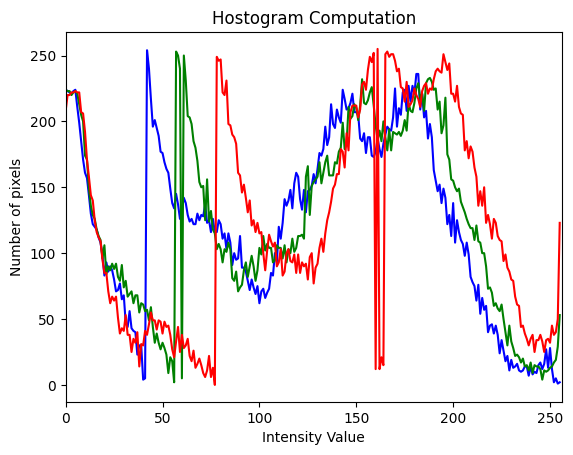

True

In [15]:
img = cv.imread('3.GammaCorrection_Results/Gamma_2.0.jpg',cv.IMREAD_COLOR)

b,g,r = cv.split(img)
layers = np.array([b,g,r])
color = ['b','g','r']
for i,channel in enumerate(layers):
    hist = np.zeros(256)
    for r in channel:
        hist[r]+=1
    plt.plot(hist.astype('uint8'),color=color[i])
    plt.xlim(0,256)

    
plt.xlabel('Intensity Value')
plt.ylabel('Number of pixels')
plt.title('Hostogram Computation')
plt.savefig('3.3.plot.png')
plt.show()

cv.imwrite('3.3.image.jpg',img)

## Question 4

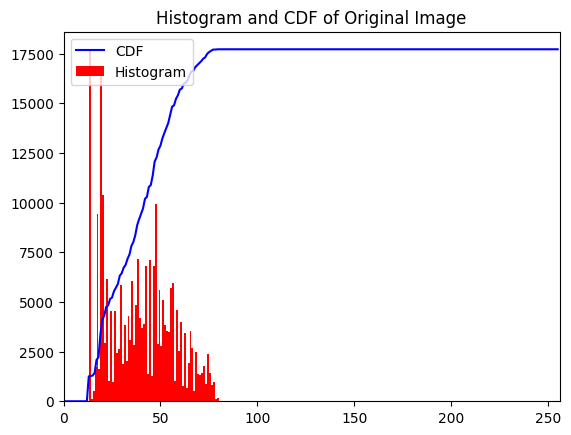

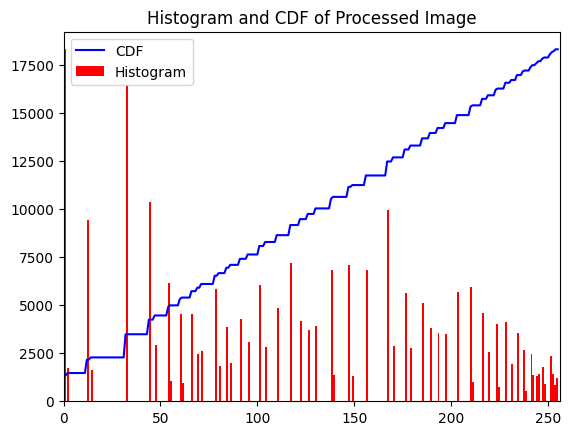

In [16]:
img = cv.imread('images/shells.png',cv.IMREAD_GRAYSCALE)  #reading the original image 
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('4.image_Orig.jpg',img)

hist,bins = np.histogram(img.flatten(),256,[0,256])  #calculating the histogram and cdf befor equalizing
cdf = hist.cumsum()
cdf_norm = cdf*hist.max()/cdf.max()

plt.plot(cdf_norm,color = 'b')    #plotting the histogram and cdf
plt.hist(img.flatten(),256,[0,256],color='r')
plt.legend(('CDF','Histogram'),loc='upper left')
plt.xlim(0,256)
plt.title('Histogram and CDF of Original Image')
plt.savefig('4.plot_Orig.png')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)   #Equalizing Manually
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_equal = cdf[img]

#img_equal = cv.equalizeHist(img)  #Equalizing using unbuilt function

cv.namedWindow('Equalized',cv.WINDOW_NORMAL)   #showing equalized image
cv.imshow('Equalized',img_equal)
cv.imwrite('4.image_Proce.jpg',img_equal)

hist,bins = np.histogram(img_equal.flatten(),256,[0,256])  #Calculating histogram and cdf
cdf=hist.cumsum()
cdf_norm = cdf*hist.max()/cdf.max()

plt.plot(cdf_norm,color = 'b')  #plotting
plt.hist(img_equal.flatten(),256,[0,256],color='r')
plt.legend(('CDF','Histogram'),loc='upper left')
plt.xlim(0,256)
plt.title('Histogram and CDF of Processed Image')
plt.savefig('4.plot_Proce.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()



## Question 5

In [17]:
# scaling_Factor = 4


# def NearestNeighbourScaling(image,scale):
#     dim = np.multiply(img.shape,(scale,scale))
#     result = np.zeros(dim)
#     for i in range(0,dim[0]):
#         for j in range(0,dim[1]):
#             result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
#     return np.uint8(result)

# imOr = cv.imread('images/a1q5images/a1q5images/im01.png',cv.IMREAD_GRAYSCALE)
# img= cv.imread('images/a1q5images/a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
# scaled_image = NearestNeighbourScaling(img,scaling_Factor)

# h,w = imOr.shape

# cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Original Image',img)
# # cv.imwrite('Original.png',img)
# cv.waitKey(0)
# cv.namedWindow('Nearest_Neighbor_Scaled_Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Nearest_Neighbor_Scaled_Image',scaled_image)
# # cv.imwrite('Result.png',scaled_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [18]:
# scale = 2

# def Bilinear_Interpolation_Scaling(image,scale):
#     dim = np.multiply(image.shape,(scale,scale)) #create the resultant image
#     result = np.zeros(dim)
#     for i in range(0,image.shape[0]):
#         for j in range(0,image.shape[1]):
#             result[i*scale,j*scale] = image[i,j] #fill the cells of resultant image with a gap of scale
#     for i in range(0,dim[0]-scale):
#         for j in range(0,dim[1]-scale):  
#             if( (i%scale != 0) or (j%scale != 0)):  #take a 2x2 grid 
#                 h00 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale))*scale] #base value
#                 h01 = result[int(math.floor(i/scale)+1)*scale , int(math.floor(j/scale))*scale]
#                 h10 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale)+1)*scale]
#                 h11 = result[int(math.floor(i/scale)+1)*scale ,int(math.floor(j/scale)+1)*scale]
#                 grad_y = math.modf(j/scale)[0]
#                 grad_x = math.modf(i/scale)[0]
#                 base = h00  
#                 diff_x = h01-h00
#                 diff_y = h10-h00
#                 diff_xy= h00-h10-h01+h11
#                 result[i,j] = base + diff_x*grad_x + diff_y*grad_y + diff_xy*grad_x*grad_y
#     return result.astype('uint8')


# img = cv.imread('images/a1q5images/a1q5images/im02small.png',cv.IMREAD_GRAYSCALE)
# # cv.imwrite('Org1.png',img)
# Processed = Bilinear_Interpolation_Scaling(img,scale)

# cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
# # cv.imshow('Original Image',img)
# cv.waitKey(0)
# cv.namedWindow('Bilinear_Interpolation_Scaled_Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Bilinear_Interpolation_Scaled_Image',Processed)
# # cv.imwrite('Re1.png',Processed)
# cv.waitKey(0)
# cv.destroyAllWindows()



In [19]:
scaling_Factor = 4

def SSD(imageOriginal,imageZoomed):
    errorL2 = cv.norm(imageOriginal, imageZoomed, cv.NORM_L2)
    similarity = 1 - errorL2/(imageOriginal.shape[0]*imageOriginal.shape[0])
    return similarity


def NearestNeighbourScaling(image,scale):
    dim = np.multiply(img.shape,(scale,scale))
    result = np.zeros(dim)
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
    return np.uint8(result)

def Bilinear_Interpolation_Scaling(image,scale):
    dim = np.multiply(image.shape,(scale,scale)) #create the resultant image
    result = np.zeros(dim)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            result[i*scale,j*scale] = image[i,j] #fill the cells of resultant image with a gap of scale
    for i in range(0,dim[0]-scale):
        for j in range(0,dim[1]-scale):
            if( (i%scale != 0) or (j%scale != 0)):  #take a 2x2 grid
                h00 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale))*scale] #base value
                h01 = result[int(math.floor(i/scale)+1)*scale , int(math.floor(j/scale))*scale]
                h10 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale)+1)*scale]
                h11 = result[int(math.floor(i/scale)+1)*scale ,int(math.floor(j/scale)+1)*scale]
                grad_y = math.modf(j/scale)[0]
                grad_x = math.modf(i/scale)[0]
                base = h00
                diff_x = h01-h00
                diff_y = h10-h00
                diff_xy= h00-h10-h01+h11
                result[i,j] = base + diff_x*grad_x + diff_y*grad_y + diff_xy*grad_x*grad_y
    return result.astype('uint8')


imOr = cv.imread('images/a1q5images/a1q5images/im01.png',cv.IMREAD_GRAYSCALE)
img= cv.imread('images/a1q5images/a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
scaled_image_Near = NearestNeighbourScaling(img,scaling_Factor)
scaled_image_Bi = Bilinear_Interpolation_Scaling(img,scaling_Factor)

print("SSD of Nearest-Neighbour: %.3f"%SSD(imOr,scaled_image_Near))
print("SSD of Bilinear: %.3f"%SSD(imOr,scaled_image_Bi))

cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image',img)
cv.imwrite('5.Original.png',img)
cv.waitKey(0)

cv.namedWindow('Nearest_Neighbor_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Nearest_Neighbor_Scaled_Image',scaled_image_Near)
cv.imwrite('5.ResultNear.png',scaled_image_Near)

cv.namedWindow('BilinearInter_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('BilinearInter_Scaled_Image',scaled_image_Near)
cv.imwrite('5.ResultBi.png',scaled_image_Bi)

cv.waitKey(0)
cv.destroyAllWindows()

SSD of Nearest-Neighbour: 0.986
SSD of Bilinear: 0.982


## Question 6

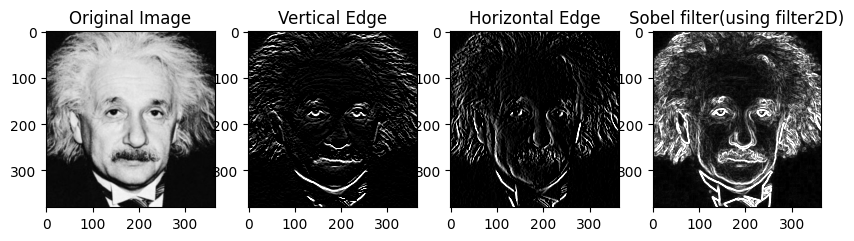

In [20]:
im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.float32)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).astype(np.float32)
result_v = cv.filter2D(im, -1, sobel_v)
result_h = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(result_v**2 + result_h**2)


fig, ax = plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Vertical Edge')
ax[2].imshow(result_h, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Horizontal Edge')
ax[3].imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Sobel filter(using filter2D)')
plt.savefig('6.1.plot.png')
plt.show()

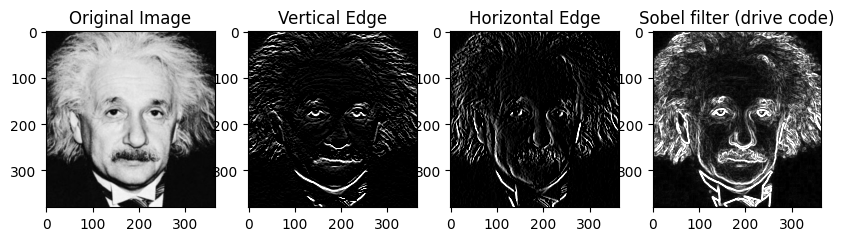

In [21]:

def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    kernel_h, kernel_w = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    image_h, image_w = image.shape
    image_float = image.astype('float')
    filtered = np.zeros(image.shape, 'float')

    for i in range(kernel_h, image_h - kernel_h):
        for j in range(kernel_w , image_w - kernel_w):
            filtered[i, j] = np.dot(image_float[i - kernel_h : i + kernel_h + 1 , j - kernel_w : j+ kernel_w + 1].flatten(), kernel.flatten())

    return filtered

im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.float32)
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).astype(np.float32)
new_image_x = filter(im, sobel_v)
new_image_y = filter(im, sobel_h)
grad_mag = np.sqrt(new_image_x**2 + new_image_y**2)

fig, ax = plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Vertical Edge')
ax[2].imshow(result_h, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Horizontal Edge')
ax[3].imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Sobel filter (drive code)')
plt.savefig('6.2.plot.png')
plt.show()




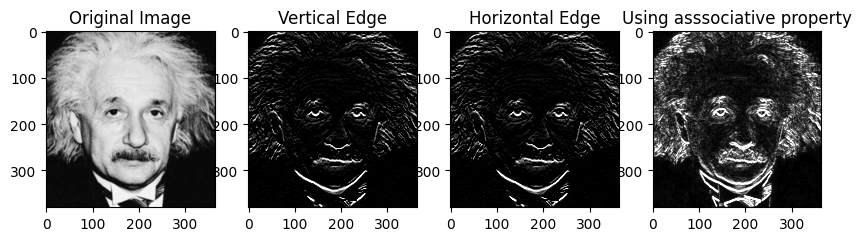

In [22]:
im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None
kernel_y1 = np.array([1, 2, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [0], [1]], dtype = np.float32)
image_y2 = cv.filter2D(im, -1, kernel_y2)
image_y2 = cv.filter2D(image_y2, -1, kernel_y1)

kernel_x1 = np.array([1, 0, -1], dtype = np.float32)
kernel_x2 = np.array([[-1], [-2], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(im, -1, kernel_x2)
image_x2 = cv.filter2D(image_x2, -1, kernel_x1)

grad_mag = np.sqrt(image_y2**2 + image_x2**2)

fig, ax = plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_y2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Vertical Edge')
ax[2].imshow(image_x2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Horizontal Edge')
ax[3].imshow(grad_mag, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Using asssociative property')
plt.savefig('6.3.plot.png')
plt.show()

## Question 7

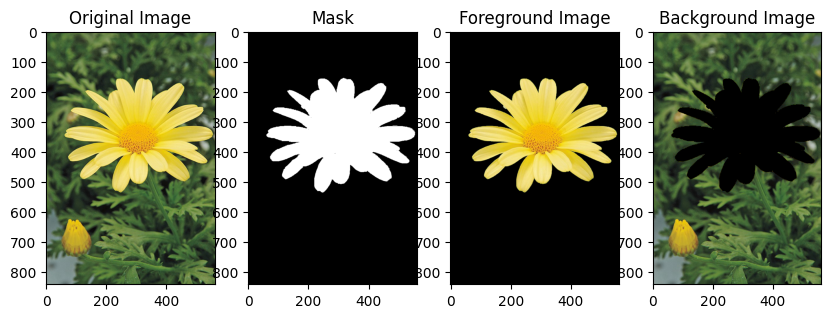

In [23]:
im = cv.imread('images/daisy.jpg')
assert im is not None
img_rgb=cv.cvtColor(im,cv.COLOR_BGR2RGB)
mask = np.zeros(img_rgb.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

rectangle = (50, 100, 550, 500)

cv.grabCut(img_rgb, mask, rectangle,backgroundModel, foregroundModel,
			3, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

# The final mask is multiplied with the input image to give the segmented image.
fore = img_rgb * mask2[:, :, np.newaxis]
back = img_rgb-fore

# output segmented image with colorbar
fig, ax = plt.subplots(1,4, figsize=(10,20))
ax[0].imshow(img_rgb, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(mask2, cmap='gray')
ax[1].set_title("Mask")
ax[2].imshow(fore, cmap='gray')
ax[2].set_title("Foreground Image")
ax[3].imshow(back, cmap='gray')
ax[3].set_title("Background Image")
plt.savefig('7.1.plot.png')
plt.show()


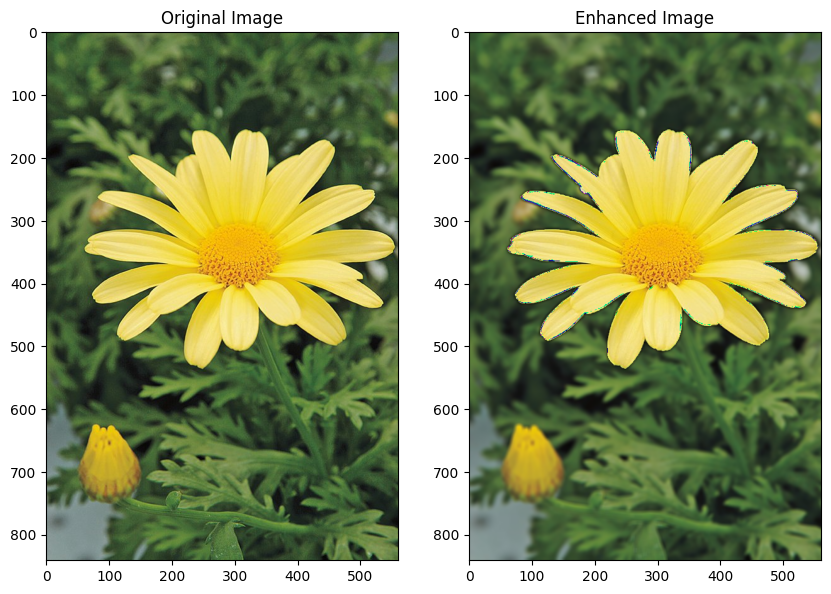

In [24]:
gaus = cv.GaussianBlur(back,(7, 7),4) # 1-D Gaussina kernel 
enhanced = gaus+fore 

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(enhanced)
ax[1].set_title("Enhanced Image")
plt.savefig('7.2.plot.png')
plt.show()

In [25]:
# t1 = np.linspace(50,50,181).astype('uint8')   #Creating regions Look up table  
# t2 = np.linspace(1,180,0).astype('uint8')   
# t3 = np.linspace(181,255,85).astype('uint8')

# transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8') #Creating the transformation functions

# t1 = np.linspace(0,180,181).astype('uint8')   #Creating regions Look up table  
# t2 = np.linspace(181,0,0).astype('uint8')   
# t3 = np.linspace(0,0,85).astype('uint8')

# transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8') #Creating the transformation functions
# def SSD(imageOriginal,imageZoomed):
    # assert imageOriginal.shape == imageZoomed.shape
    # h, w = imageOriginal.shape
    # num = np.sum(np.power((imageZoomed-imageOriginal),2))
    # deno = h*w
    # return float(num)/float(deno)